<a href="https://colab.research.google.com/github/arturbernardo/convolutionRGB/blob/main/convolutional_matrix_rgb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from PIL import Image
from google.colab import drive
from matplotlib import pyplot as plt
import scipy.signal
from PIL import Image, ImageFilter 
import cv2 
import numpy as np

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
kernel_edgedetection = np.matrix([[-1, -1, -1],
                                 [-1, 8.5, -1],
                                 [-1, -1, -1]])

In [6]:
blur = np.matrix([[0.111, 0.111, 0.111],
                  [0.111, 0.111, 0.111],
                  [0.111, 0.111, 0.111]])

In [7]:
edge = np.matrix([[-1, -1, -1],
                  [-1, 8, -1],
                  [-1, -1, -1]])

In [8]:
horizontal_edges = np.matrix([[0.111, 0.111, -0.111],
                              [-0.222, 0.111, -0.222],
                              [0.111, 0.111, -0.111]])

In [9]:
vertical_edges = np.matrix([[0.111, -0.222, 0.111],
                            [0.111, 0.111, 0.111],
                            [-0.111, -0.222, -0.111]])

In [10]:
nope = np.matrix([[0, 0, 0],
                  [0, 1, 0],
                  [0, 0, 0]])

In [11]:
image = Image.open(r"/content/drive/MyDrive/python_general/pernalonga.jpeg")
# img_grey = image.convert('L')

In [1]:
# 170, 200 Van Gogh
# 800, 380 Grumpy

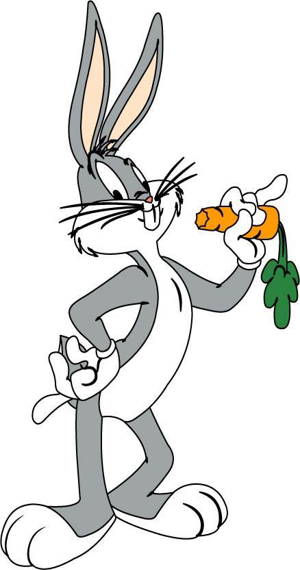

In [12]:
new_image = image.resize((300, 570))  # 434, 570 # 170, 200)
new_image

In [13]:
new_image = new_image.convert("RGB")


In [14]:
matrix = np.array(new_image)
matrix.shape


(570, 300, 3)

In [26]:
v = matrix[280:283,210:213,0:3]
v[:,:,0]

array([[213, 255, 249],
       [ 38,  95, 189],
       [ 56,  13,  11]], dtype=uint8)

In [27]:
v

array([[[213, 213, 213],
        [255, 255, 255],
        [249, 249, 249]],

       [[ 38,  38,  38],
        [ 95,  95,  95],
        [189, 189, 189]],

       [[ 56,  57,  59],
        [ 13,  13,  15],
        [ 11,  11,  13]]], dtype=uint8)

In [ ]:
x=np.zeros(shape=(matrix.shape[0],matrix.shape[1], matrix.shape[2]), dtype=int)
x[1,1]

In [17]:
b = matrix[280:283,210:213,0:3] # [0,0]
b

array([[[213, 213, 213],
        [255, 255, 255],
        [249, 249, 249]],

       [[ 38,  38,  38],
        [ 95,  95,  95],
        [189, 189, 189]],

       [[ 56,  57,  59],
        [ 13,  13,  15],
        [ 11,  11,  13]]], dtype=uint8)

In [20]:
b[:,:,0]

array([[213, 255, 249],
       [ 38,  95, 189],
       [ 56,  13,  11]], dtype=uint8)

In [ ]:
b[0,0]

array([235,  86,  99], dtype=uint8)

In [ ]:
matrix[:,:,0:3]

# . . .
# . . .
# . . .

# [., ., .]

In [15]:
def reduce_matrix(to_be_reduced, filter):
  ru = (to_be_reduced[:,:,0]*filter[:,:])
  r = np.sum(ru)

  gu = (to_be_reduced[:,:,1]*filter[:,:])
  g = np.sum(gu)

  bu = (to_be_reduced[:,:,2]*filter[:,:])
  b = np.sum(bu)
  return [r, g, b]

x=np.zeros(shape=(matrix.shape[0],matrix.shape[1], matrix.shape[2]), dtype=int)

for i in range(len(matrix)):
  for j in range(len(matrix[i])):
    if (i+1 >= matrix.shape[0]):
      break
    if (j+1 >= matrix.shape[1]):
      break
    pos_matrix = matrix[i-1:i+2,j-1:j+2,0:3]
    # print(pos_matrix)
    if (pos_matrix.size != 0):
      g = reduce_matrix(pos_matrix, horizontal_edges)

      # print("---")
      # print(x[i, j])
      # print(pos_matrix)
      # print(g)
      x[i, j] = g
      # print(x[i, j])
      # print("---")

    else:
      x[i, j] = np.array([255, 255, 255], dtype=int)

# . . .
# . . .
# . . .

In [ ]:
x

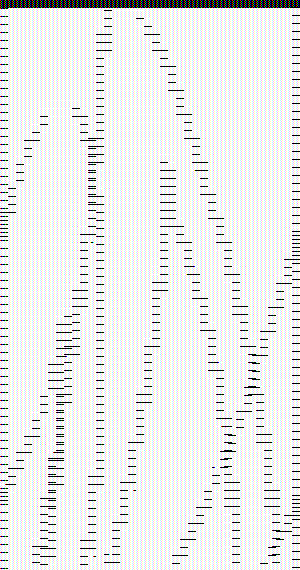

In [16]:
pil_img = Image.fromarray(x, 'RGB')
pil_img

In [ ]:
new_image = Image.fromarray(x)
# new_image.save("new_image.jpeg")
plt.imshow(new_image)


plt.rcParams["figure.figsize"] = [20, 20]
plt.rcParams["figure.autolayout"] = True

plt.axis("off")
plt.show()